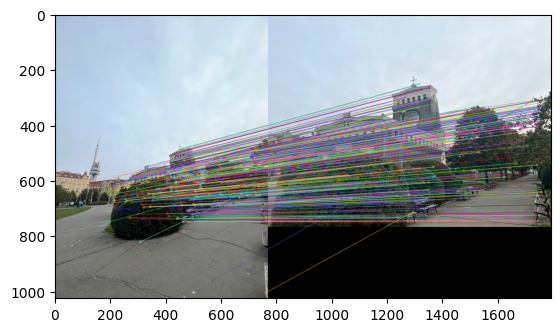

In [3]:
import cv2
import matplotlib.pyplot as plt

def so_khop_dac_trung(img1, img2, k=2, ratio_thresh=0.75):
    """
    Hàm so khớp đặc trưng giữa hai ảnh bằng SIFT, Brute-Force Matcher, và ratio test.

    Tham số:
    img1: ảnh mẫu (template image)
    img2: ảnh gốc (query image)
    k: số lượng điểm ảnh hàng xóm gần nhất để kiểm tra
    ratio_thresh: ngưỡng để lọc các điểm khớp tốt (thường lấy giá trị từ 0.7 đến 0.8)

    Trả về:
    matches: danh sách các điểm khớp tốt
    """
    # Chuyển ảnh sang thang màu xám
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Khởi tạo SIFT detector
    sift = cv2.SIFT_create()
    
    # Tìm các điểm đặc trưng và mô tả đặc trưng
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)
    
    # Tạo BF matcher với L2 norm, chọn false để không sắp xếp các điểm khớp
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    
    # Tìm k điểm khớp tốt nhất
    matches = bf.knnMatch(descriptors1, descriptors2, k=k)
    
    # Lọc các điểm khớp bằng ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)

    return keypoints1, keypoints2, good_matches

# Đọc ảnh mẫu và ảnh gốc
img1 = cv2.imread('image/church1.png')  # Đường dẫn tới ảnh mẫu
img2 = cv2.imread('image/church2.png')      # Đường dẫn tới ảnh gốc

# Thực hiện so khớp
keypoints1, keypoints2, good_matches = so_khop_dac_trung(img1, img2)

# Vẽ các điểm khớp tốt lên ảnh để trực quan
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, 
                              None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Hiển thị ảnh kết quả
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()